# Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
- Sex / nominal / -- / M, F, and I (infant)
- Length / continuous / mm / Longest shell measurement
- Diameter / continuous / mm / perpendicular to length
- Height / continuous / mm / with meat in shell
- Whole weight / continuous / grams / whole abalone
- Shucked weight / continuous / grams / weight of meat
- Viscera weight / continuous / grams / gut weight (after bleeding)
- Shell weight / continuous / grams / after being dried
- Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone.

# Downlaod Files:

* https://github.com/dsrscientist/dataset1/blob/master/abalone.csv

In [1]:
#Import Neccessary Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read data

data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# From the above data table I have observerd that we have 1 Categorical column which is 'Sex' rest all the columns are integer and float. As per the question statement I'll have to predict the ring column, so here ring is my target variable and the numbers are continuous hence I'll build few regression models and choose 1 best model to predict the same.

In [3]:
#Checking null values
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
#Checking data shape
data.shape

(4177, 9)

In [5]:
#Checking data types and dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
#Checking counts of sex column
data.Sex.value_counts(normalize = True)

M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

In [7]:
# Number of Rings distributions : 
data.Rings.value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [8]:
#Checking statistics of the data.
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Observations

* No Null values are present in the dataset.
* All the features are Numerical but 'Sex'.
* Feature Height has min as 0 wich needs to be rechecked.
* Each features has different scale range.

# I will implement heat map to check correlation between features.

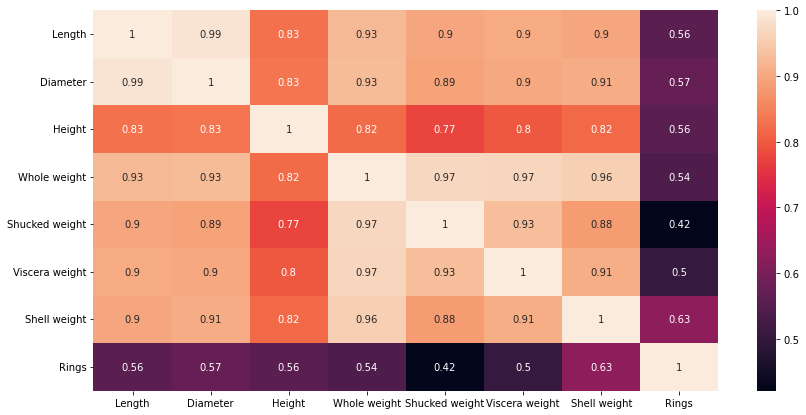

In [9]:
#Creating heatmap
plt.figure(figsize = (14,7))
sns.heatmap(data.corr(), annot = True)
plt.show()

- All the indepenndent features are strongly correlated with each other. 
- All the independent features has good relationship with target variable.

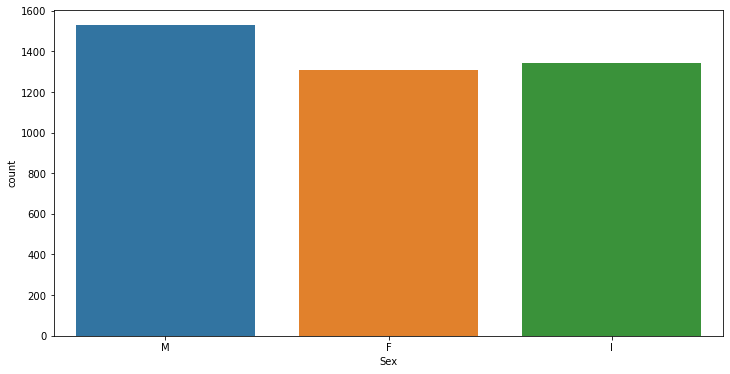

In [10]:
#Creating a count plot for sex
plt.figure(figsize = (12,6))
sns.countplot(data['Sex'])
plt.show()

# I can see 'Male' counts are higher followed by 'Infant' and 'Female'.

<Figure size 1152x576 with 0 Axes>

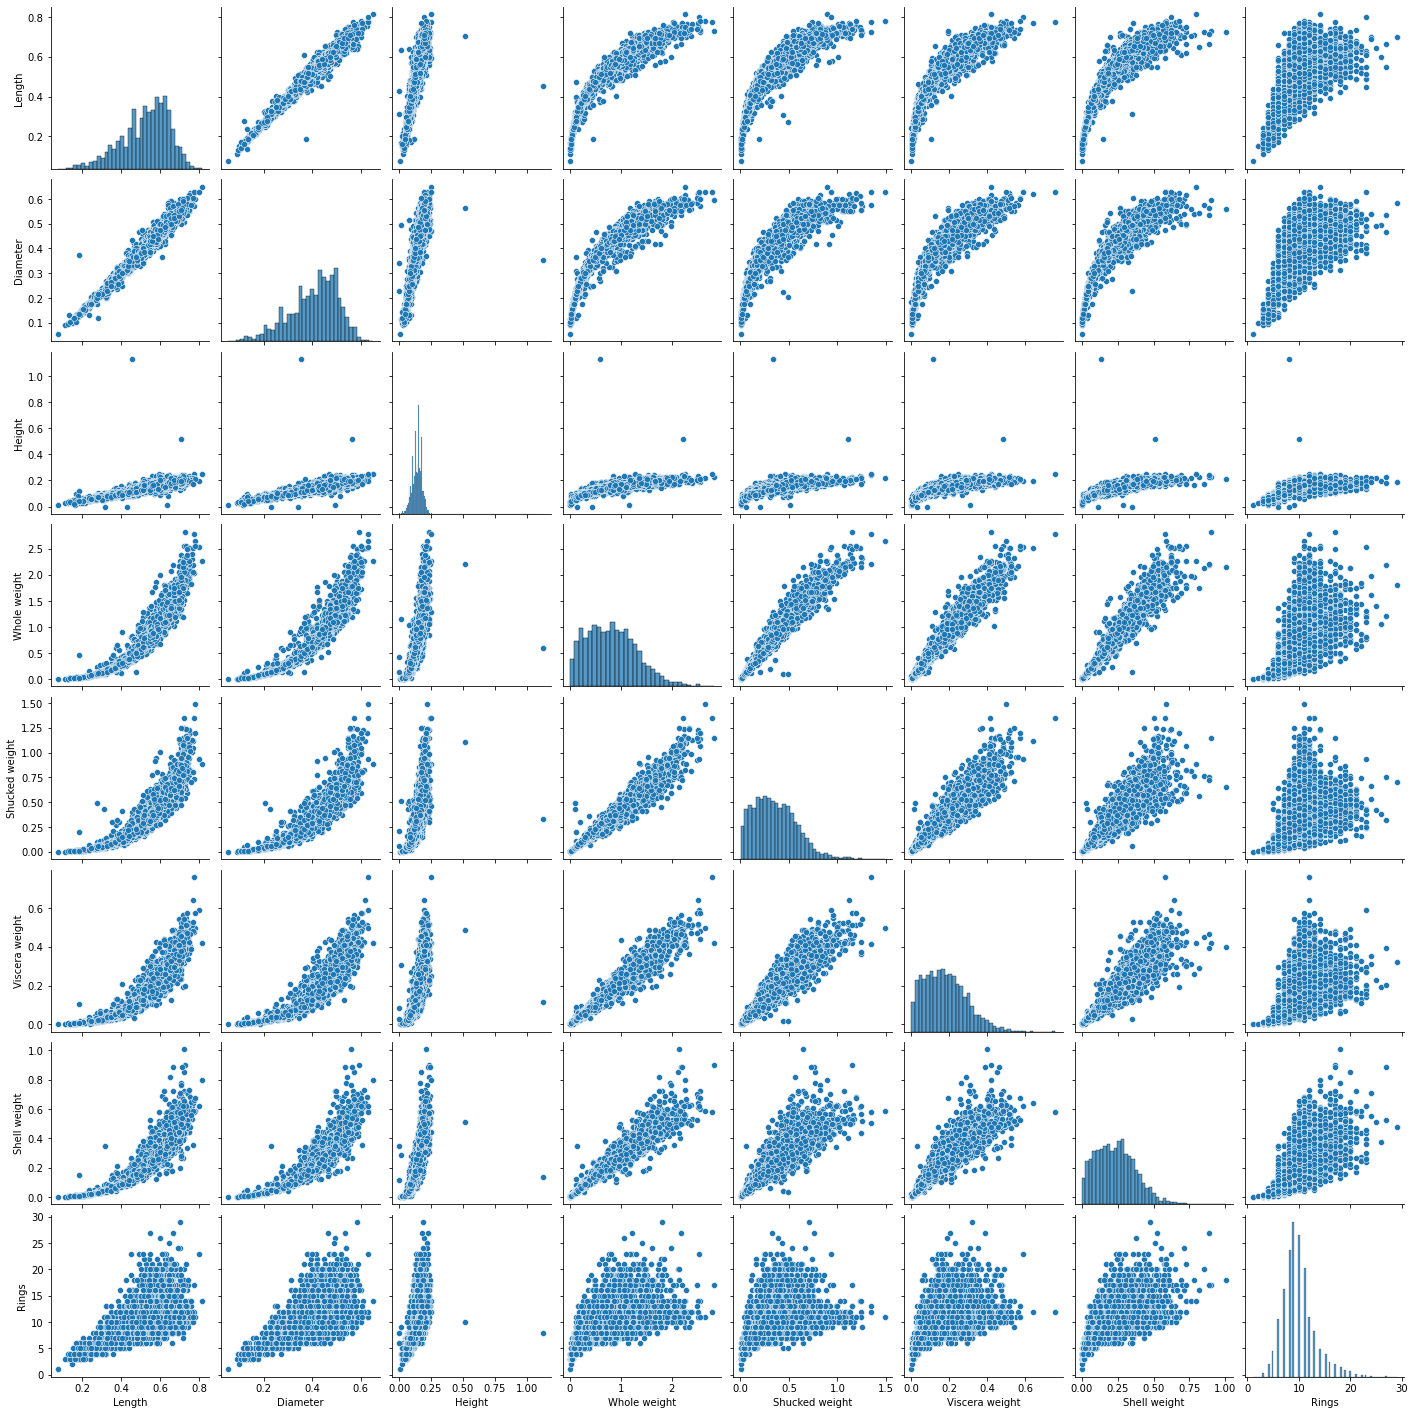

In [11]:
#Will visualize the data with pair plot
plt.figure(figsize = (16,8))
sns.pairplot(data)
plt.show()

* Height is strongly correlated with all the features.
* Dadaset has multicollinearity issue among features.
* Seeing some outliers will investigate further.

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

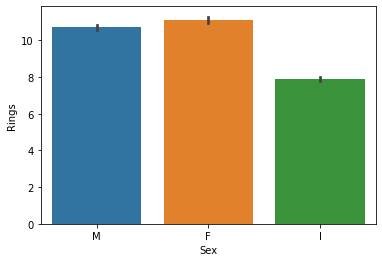

In [12]:
#Checking ring counts for sex
sns.barplot(x = data['Sex'], y = data['Rings'])

* Female abalone ring counts is higher than Male which is around 12.
* Male abalone has rings around 11.
* Infant abalone ring counts are arond 7.

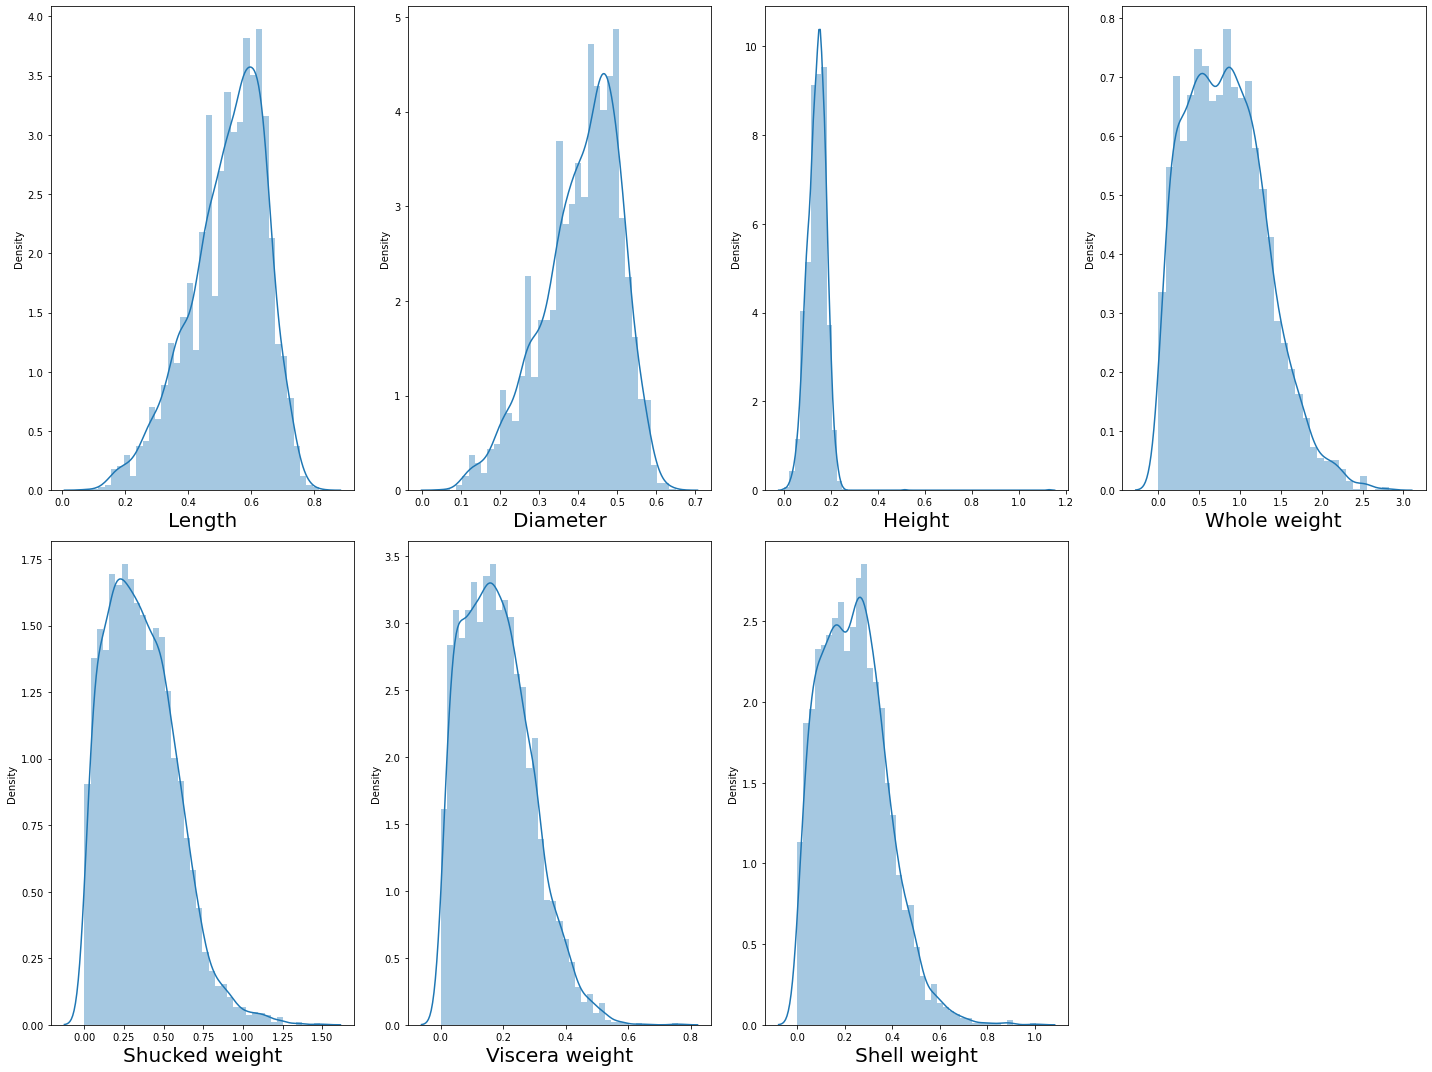

In [13]:
#Checking how data is distributed for all the independent features excluding sex.
plt.figure(figsize = (20,15))

plotnumber = 1

for column in data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]:
    if plotnumber <= 7:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

# I can see all the features have skewness, will check for the outliers using box plot.

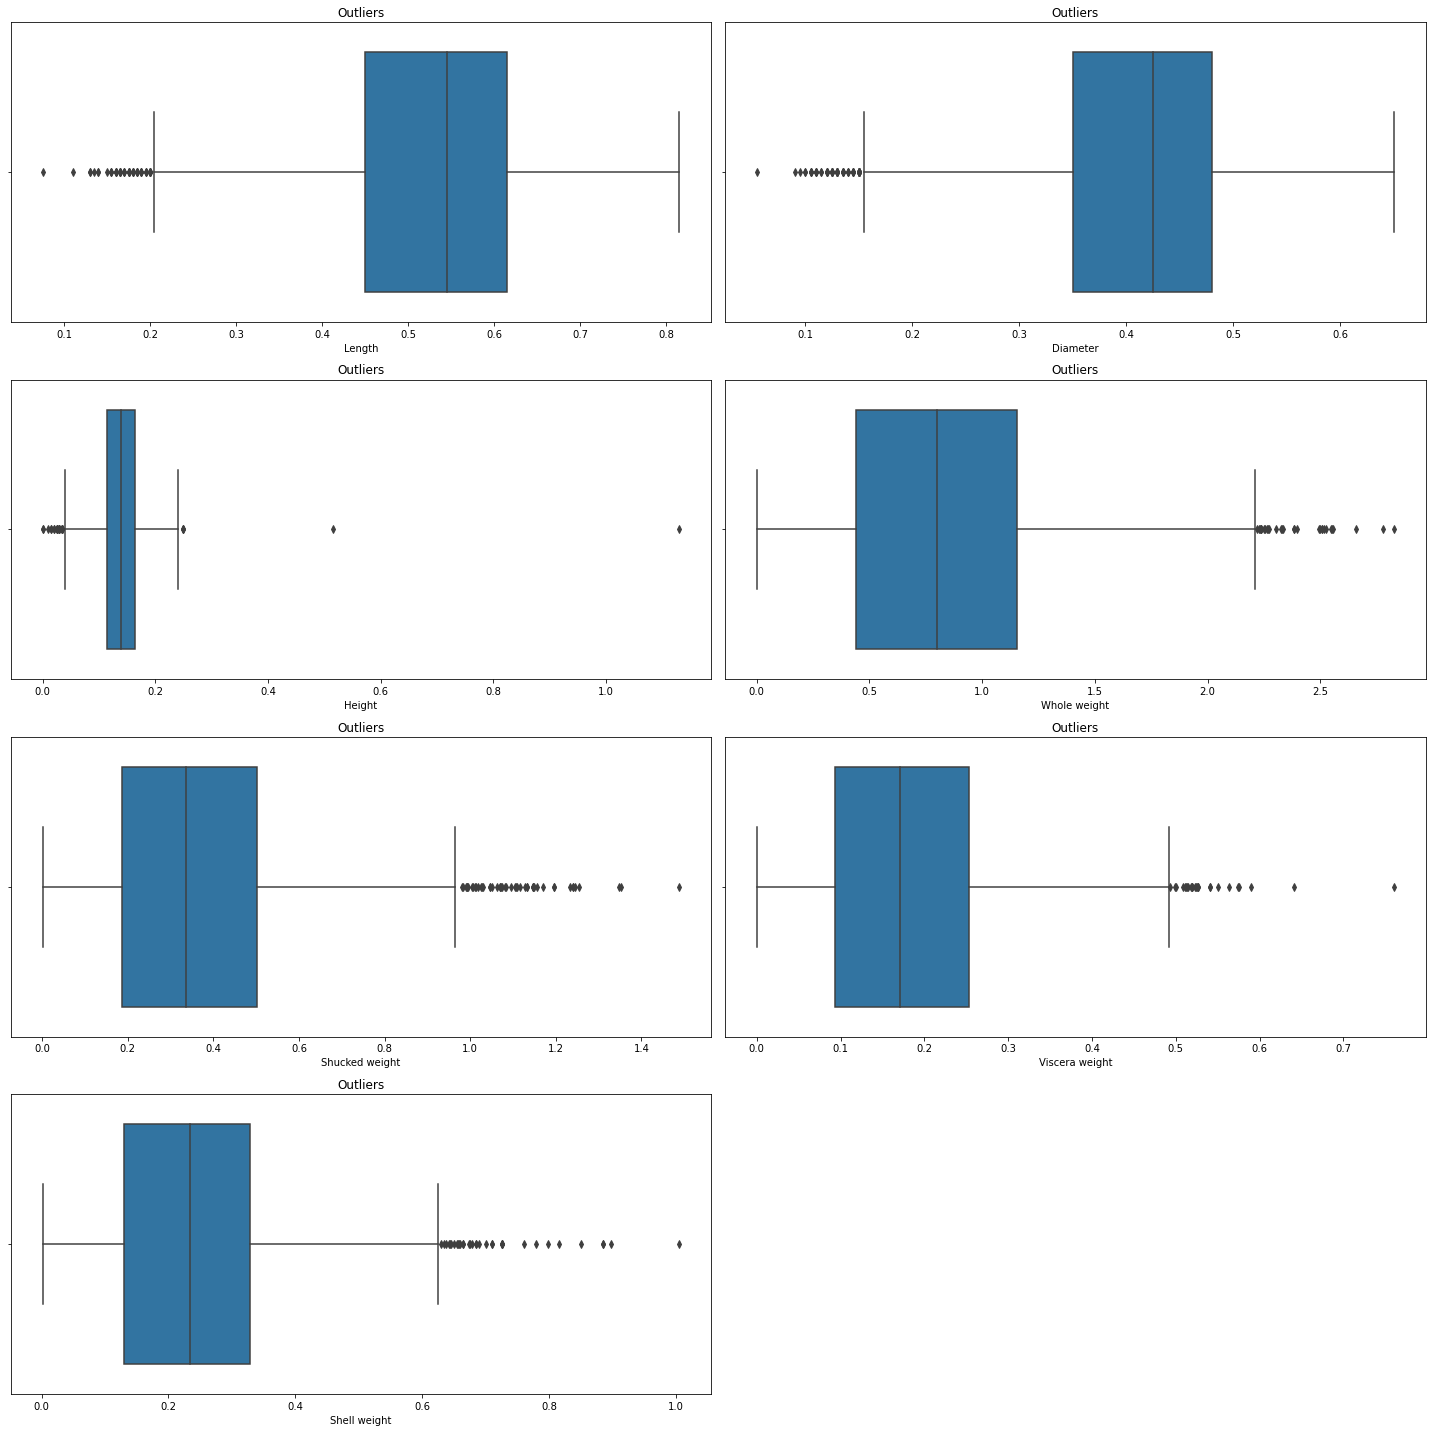

In [14]:
#Will implement boxplot to check outliers
plt.figure(figsize = (20,20))
plotnumber = 1

for column in data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]:
    if plotnumber <= 7:
        plt.subplot(4,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        plt.title('Outliers')
    
    plotnumber += 1
    
plt.tight_layout() 

# As I have observed earlier I can see outliers are present for all the features. Next will remove the outliers and check distribution again.

In [15]:
#Remove lower range outliers for Length.
def remove_outliers_length(data):
    iqr = data['Length'].quantile(0.75) - data['Length'].quantile(0.25)
    
    lower_range = data['Length'].quantile(0.25) - (1.5 * iqr)
    
    data.loc[data['Length'] <= lower_range, 'Length'] = lower_range

In [16]:
remove_outliers_length(data)

In [17]:
#Remove lower range outliers for Diameter.
def remove_outliers_Diameter(data):
    IQR = data['Diameter'].quantile(0.75) - data['Diameter'].quantile(0.25)
    
    lower_range1 = data['Diameter'].quantile(0.25) - (1.5 * IQR)
    
    data.loc[data['Diameter'] <= lower_range1, 'Diameter'] = lower_range1

In [18]:
remove_outliers_Diameter(data)

In [19]:
#Remove outliers for Height.
def remove_outliers_Height(data):
    
    IQR1 = data['Height'].quantile(0.75) - data['Height'].quantile(0.25)
    
    high_range = data['Height'].quantile(0.75) + (1.5 * IQR1)
    lower_range2 = data['Height'].quantile(0.25) - (1.5 * IQR1)
    
    data.loc[data['Height'] >= high_range, 'Height'] = high_range
    data.loc[data['Height'] <= lower_range2, 'Height'] = lower_range2

In [20]:
remove_outliers_Height(data)

In [21]:
#Remove higher range outliers for Whole weight.
def remove_outliers_Whole_weight(data):
    
    IQR2 = data['Whole weight'].quantile(0.75) - data['Whole weight'].quantile(0.25)
    
    high_range1 = data['Whole weight'].quantile(0.75) + (1.5 * IQR2)
    
    data.loc[data['Whole weight'] >= high_range1, 'Whole weight'] = high_range1

In [22]:
remove_outliers_Whole_weight(data)

In [23]:
#Remove higher range outliers for Shucked weight.
def remove_outliers_Shucked_weight(data):
    
    IQR3 = data['Shucked weight'].quantile(0.75) - data['Shucked weight'].quantile(0.25)
    
    high_range2 = data['Shucked weight'].quantile(0.75) + (1.5 * IQR3)
    
    data.loc[data['Shucked weight'] >= high_range2, 'Shucked weight'] = high_range2

In [24]:
remove_outliers_Shucked_weight(data)

In [25]:
#Remove higher range outliers for Viscera weight.
def remove_outliers_Viscera_weight(data):
    
    IQR4 = data['Viscera weight'].quantile(0.75) - data['Viscera weight'].quantile(0.25)
    
    high_range3 = data['Viscera weight'].quantile(0.75) + (1.5 * IQR4)
    
    data.loc[data['Viscera weight'] >= high_range3, 'Viscera weight'] = high_range3

In [26]:
remove_outliers_Viscera_weight(data)

In [27]:
#Remove higher range outliers for Shell weight.
def remove_outliers_Shell_weight(data):
    
    IQR5 = data['Shell weight'].quantile(0.75) - data['Shell weight'].quantile(0.25)
    
    high_range4 = data['Shell weight'].quantile(0.75) + (1.5 * IQR5)
    
    data.loc[data['Shell weight'] >= high_range4, 'Shell weight'] = high_range4

In [28]:
remove_outliers_Shell_weight(data)

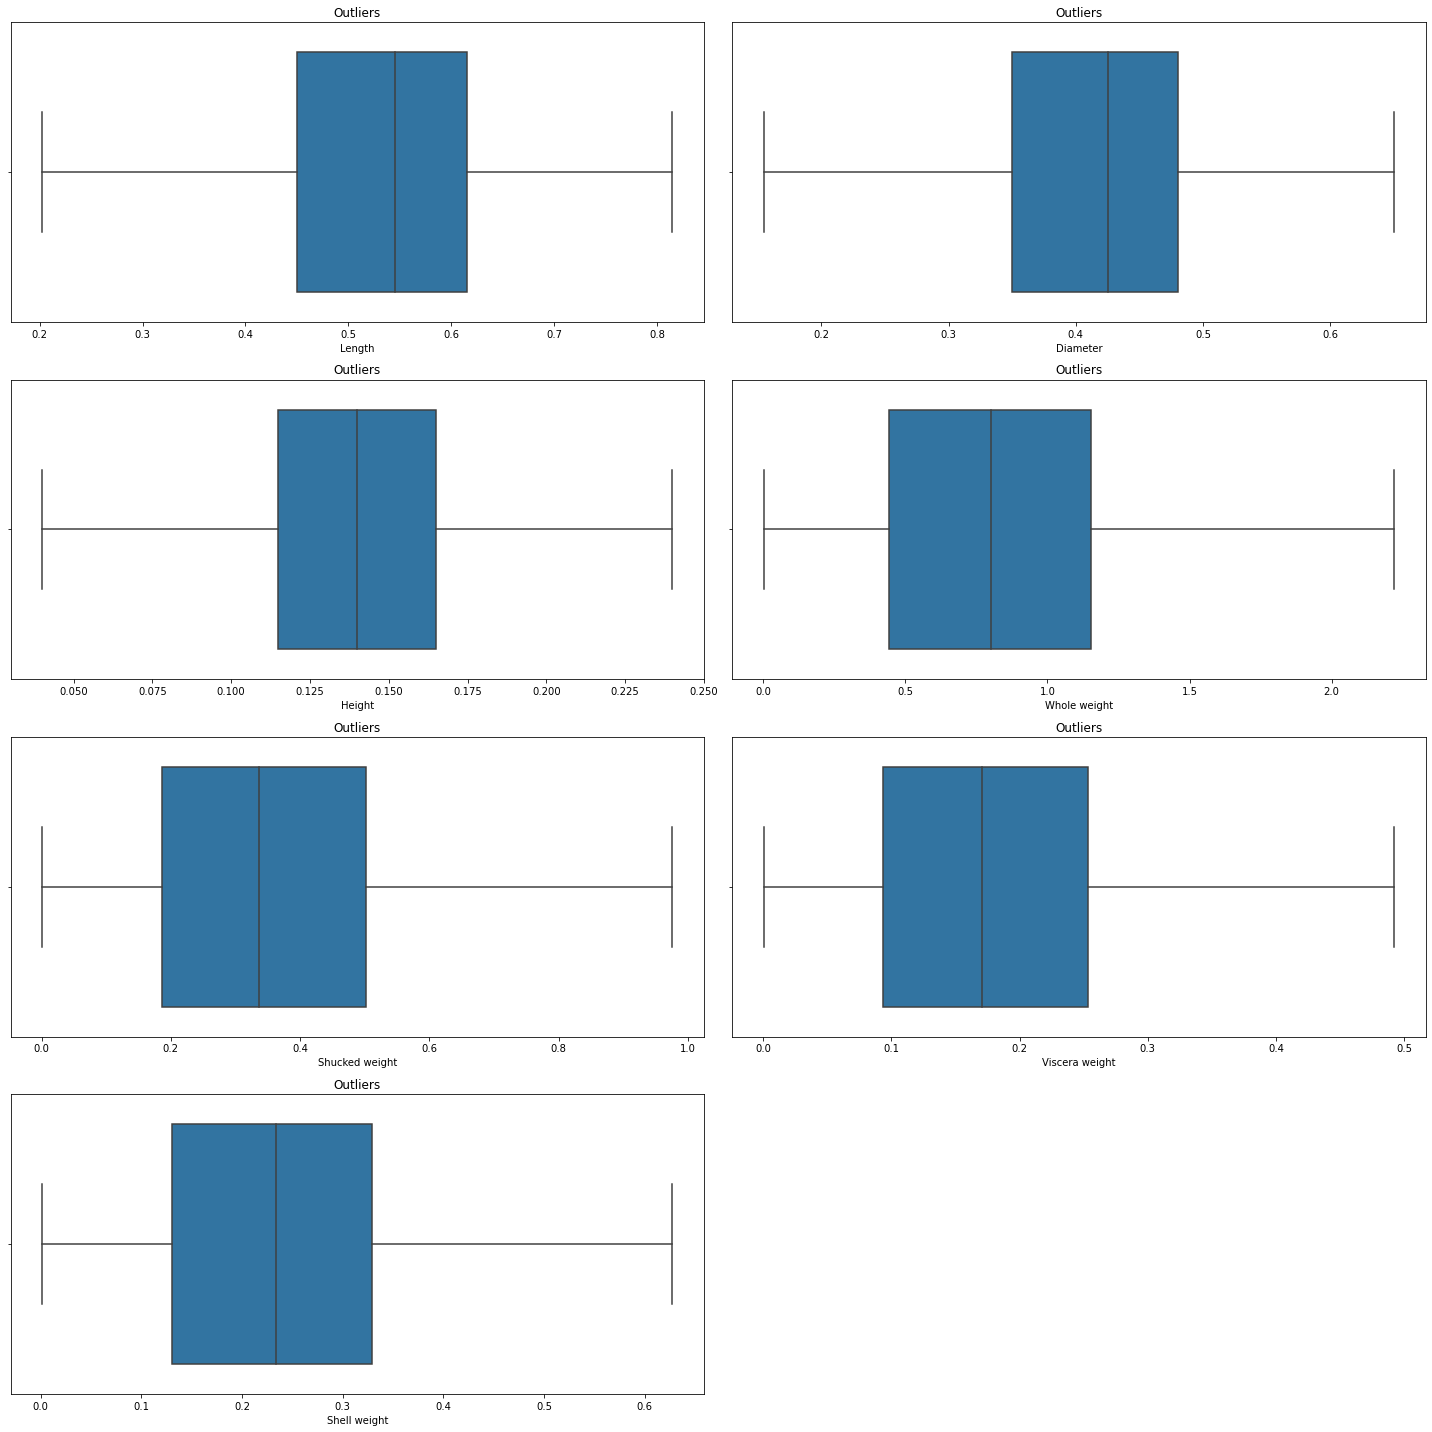

In [29]:
#Will implement boxplot to check if outliers have been removed.
plt.figure(figsize = (20,20))
plotnumber = 1

for column in data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]:
    if plotnumber <= 7:
        plt.subplot(4,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        plt.title('Outliers')
    
    plotnumber += 1
    
plt.tight_layout() 

# Outliers have been successfully removed from the data set, will check data distribution again.

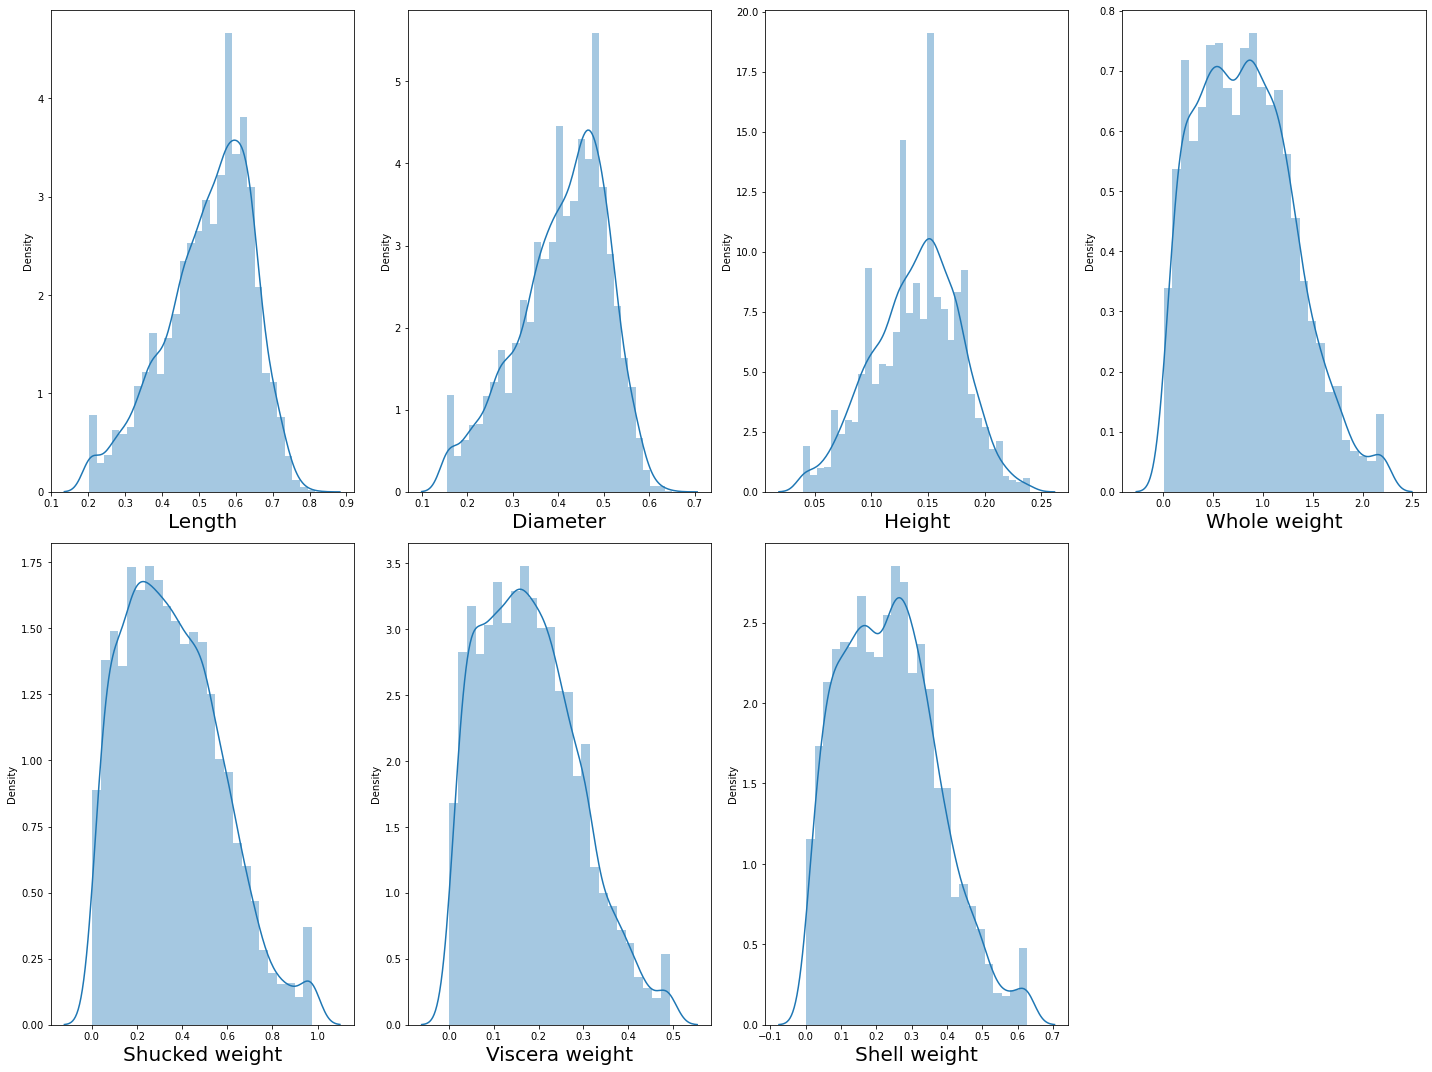

In [30]:
#Checking how data is distributed for all the independent features excluding sex.
plt.figure(figsize = (20,15))

plotnumber = 1

for column in data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]:
    if plotnumber <= 7:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

# Data distribution looks good enough. Next I will convert the object column which is 'Sex' to a numerical value by using lable encoder algorithm.

In [31]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

#Assigning Label Encoder to a variable
lab_encoder = LabelEncoder()

# transform data
data["Sex"] =  lab_encoder.fit_transform(data["Sex"])

In [32]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Now all the features are in numerical value. Next I will add 1.5 value to the rings to get the age and will add them into the dataset.

In [33]:
#Adding Age column.
data['Age'] = data['Rings'] + 1.5

#Droping Rings column
data.drop('Rings', axis = 1, inplace = True)

In [34]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Spliting data into X and Y variable

In [35]:
# Spliting data
x = data.drop(columns = 'Age')
y = data['Age']

In [36]:
#Priting x data
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [37]:
#Printing y data
y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [38]:
#Will scale x data.
from sklearn.preprocessing import StandardScaler

#Assigning Statndard scaler to a variable.
ss = StandardScaler()

In [39]:
x_scaled = ss.fit_transform(x)

In [40]:
#Pring scaled data.
x_scaled

array([[ 1.15198011, -0.58311728, -0.44088378, ..., -0.61498531,
        -0.73030425, -0.64518445],
       [ 1.15198011, -1.46569411, -1.45976205, ..., -1.1916374 ,
        -1.21388983, -1.23138964],
       [-1.28068972,  0.04729474,  0.11949927, ..., -0.46736237,
        -0.35725252, -0.20553056],
       ...,
       [ 1.15198011,  0.63567929,  0.67988232, ...,  0.77359293,
         0.98757595,  0.51257079],
       [-1.28068972,  0.84581663,  0.78177015, ...,  0.79896563,
         0.74348037,  0.42464001],
       [ 1.15198011,  1.56028358,  1.49498494, ...,  2.71114397,
         1.80736865,  1.88282541]])

# When I was observing the relationship among features I could see multicollinearity problem, I will use VIF algorithm to investigate same further.

In [41]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

In [43]:
#Let's check values
vif

,vif,features
0,1.010125,Sex
1,40.749866,Length
2,42.478966,Diameter
3,6.737648,Height
4,104.865965,Whole weight
5,28.727350,Shucked weight
6,17.438705,Viscera weight
7,23.345301,Shell weight


# Apart from 'Sex' feature all the features has VIF value more than 5 so it's multicollinearity problem. To solve this if I remove the features then in this case I will choose a lot of imformation and I will be left with very less data to train my models. In order to resolve this issue I will consider all the features and perform Lasso and Ridge regression later. 

# Next will split our data into train and test part

In [44]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 355)

In [45]:
# See the length of the sets
len(x_train), len(y_train), len(x_test), len(y_test)

(3132, 3132, 1045, 1045)

# Next I will create models to predict the Age or Abalone Shellfish. As it's a regression problem I will build different models and and choose one of them. 

# Random Forest Regressor¶

In [46]:
#Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Keeing RandomForestRegressor into a variable
rf = RandomForestRegressor(n_jobs=-1, random_state=14)

In [47]:
#Fit the model
rf.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [48]:
y_pred = rf.predict(x_test)

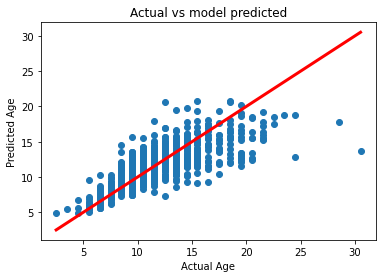

In [49]:
#From this scatter plot will visualize actual vs predicted age.

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs model predicted")

plt.show()

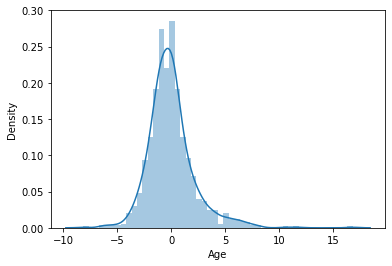

In [50]:
sns.distplot(y_test-y_pred)
plt.show()

In [51]:
#Import metrics.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Creating an evaluation function.
def show_score(rf):
    x_pred = rf.predict(x_train)
    
    scores = {'Training MAE': mean_absolute_error(y_train,x_pred),
             'Test MAE': mean_absolute_error(y_test,y_pred),
             'Training MSE': mean_squared_error(y_train, x_pred),
             'Test MSE': mean_squared_error(y_test,y_pred),
             'Training RMSE': np.sqrt(mean_squared_error(y_train,x_pred)),
             'Test RMSE': np.sqrt(mean_squared_error(y_test,y_pred)),
             'Training R2': r2_score(y_train,x_pred),
             'Test R2': r2_score(y_test,y_pred)}
    
    return scores

In [52]:
#Printing evaluation scores for Random Forest Regressor.
show_score(rf)

{'Training MAE': 0.5763793103448275,
 'Test MAE': 1.504555023923445,
 'Training MSE': 0.6600024265644956,
 'Test MSE': 4.637863732057417,
 'Training RMSE': 0.8124053339094319,
 'Test RMSE': 2.1535699970183035,
 'Training R2': 0.9356200247600004,
 'Test R2': 0.5710206540400853}

# I can see that, the error in test datasets are higher than in training datasets. It  is a good thing because when the machine model makes predictions based on the training set, it has already learned the correct answer so error will be less but at the same time, the error in the test sets is higher because the model does not know the answers to the test data. We can visualize the actual responses along with the predicted ones to see the error more clearly.

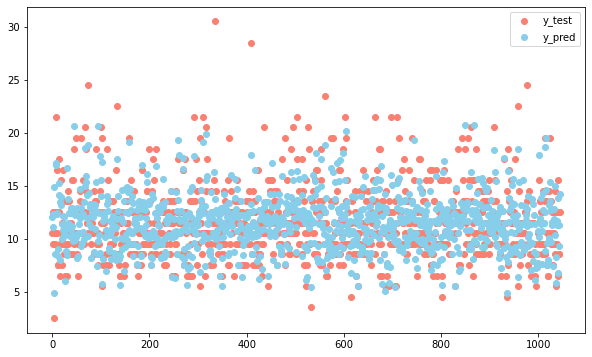

In [53]:
# Visualize predictions vs true labels
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label ="y_test")
plt.scatter(range(y_test.shape[0]), y_pred, color="skyblue", label = "y_pred")
plt.legend();

# Hyper Parameter Tuning

Model worked quite well, however I will try to improve the performace by adjusting some of the hyperparameters for that I will use RandomizedSearchCV 

In [54]:
#Check current parameters.
from pprint import pprint

print('Current Parameters')
pprint(rf.get_params())

Current Parameters
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 14,
 'verbose': 0,
 'warm_start': False}


In [55]:
#Import Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {'n_estimators': [20,100,200],
          'max_depth': [None, 1, 2, 5],
          'max_features': [0.5, 1, 'auto', 'sqrt'],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 3, 5]}

ran = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                              random_state = 14),
                         param_distributions = rf_grid,
                         n_iter = 100,
                         cv = 5,
                         verbose = True)

In [56]:
ran.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=14),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 1, 2, 5],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 100, 200]},
                   verbose=True)

In [57]:
#Creating an evaluation function.
def show_score(ran):
    ran_x_pred = ran.predict(x_train)
    ran_y_pred = ran.predict(x_test)
    
    scores = {'Training MAE': mean_absolute_error(y_train, ran_x_pred),
             'Test MAE': mean_absolute_error(y_test,ran_y_pred),
             'Training MSE': mean_squared_error(y_train, ran_x_pred),
             'Test MSE': mean_squared_error(y_test,ran_y_pred),
             'Training RMSE': np.sqrt(mean_squared_error(y_train,ran_x_pred)),
             'Test RMSE': np.sqrt(mean_squared_error(y_test,ran_y_pred)),
             'Training R2': r2_score(y_train,ran_x_pred),
             'Test R2': r2_score(y_test,ran_y_pred)}
    
    return scores

In [58]:
show_score(ran)

{'Training MAE': 1.0923124748473785,
 'Test MAE': 1.4710881793303534,
 'Training MSE': 2.4669828184098614,
 'Test MSE': 4.4806225355142075,
 'Training RMSE': 1.5706631778996607,
 'Test RMSE': 2.116748103935423,
 'Training R2': 0.7593580169190319,
 'Test R2': 0.5855646832630261}

In [59]:
ran.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 0.5,
 'max_depth': None}

In [60]:
ideal_model = RandomForestRegressor(max_depth = None,
                                    max_features = 'sqrt',
                                    min_samples_leaf = 2,
                                    min_samples_split = 2,
                                    n_estimators = 200)
# Fit the ideal model
ideal_model.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2, n_estimators=200)

In [61]:
#Creating an evaluation function.
def show_score(ideal_model):
    i_x_pred = ran.predict(x_train)
    i_y_pred = ran.predict(x_test)
    
    scores = {'Training MAE': mean_absolute_error(y_train, i_x_pred),
             'Test MAE': mean_absolute_error(y_test,i_y_pred),
             'Training MSE': mean_squared_error(y_train, i_x_pred),
             'Test MSE': mean_squared_error(y_test,i_y_pred),
             'Training RMSE': np.sqrt(mean_squared_error(y_train,i_x_pred)),
             'Test RMSE': np.sqrt(mean_squared_error(y_test,i_y_pred)),
             'Training R2': r2_score(y_train,i_x_pred),
             'Test R2': r2_score(y_test,i_y_pred)}
    
    return scores

In [62]:
show_score(ideal_model)

{'Training MAE': 1.0923124748473785,
 'Test MAE': 1.4710881793303534,
 'Training MSE': 2.4669828184098614,
 'Test MSE': 4.4806225355142075,
 'Training RMSE': 1.5706631778996607,
 'Test RMSE': 2.116748103935423,
 'Training R2': 0.7593580169190319,
 'Test R2': 0.5855646832630261}

# Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [64]:
lr.fit(x_train, y_train)

LinearRegression()

In [65]:
lr_y_pred = lr.predict(x_test)

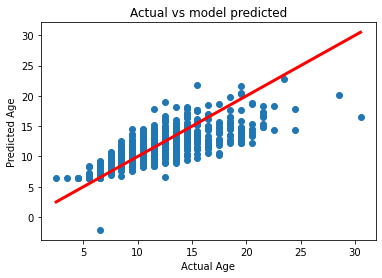

In [66]:
#From this scatter plot will visualize actual vs predicted age.

plt.scatter(y_test, lr_y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs model predicted")

plt.show()

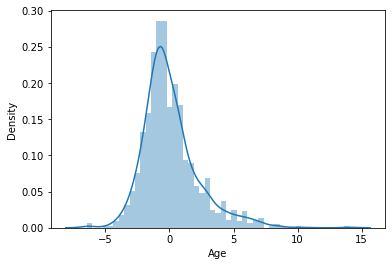

In [67]:
sns.distplot(y_test - lr_y_pred)
plt.show()

In [68]:
#Creating an evaluation function.
def show_score(lr):
    lr_x_pred = lr.predict(x_train)
    
    scores = {'Training MAE': mean_absolute_error(y_train,lr_x_pred),
             'Test MAE': mean_absolute_error(y_test,lr_y_pred),
             'Training MSE': mean_squared_error(y_train, lr_x_pred),
             'Test MSE': mean_squared_error(y_test,lr_y_pred),
             'Training RMSE': np.sqrt(mean_squared_error(y_train,lr_x_pred)),
             'Test RMSE': np.sqrt(mean_squared_error(y_test,lr_y_pred)),
             'Training R2': r2_score(y_train,lr_x_pred),
             'Test R2': r2_score(y_test,lr_y_pred)}
    
    return scores

In [69]:
show_score(lr)

{'Training MAE': 1.600406036851034,
 'Test MAE': 1.5812716806325904,
 'Training MSE': 4.834271464838873,
 'Test MSE': 4.746593347694306,
 'Training RMSE': 2.198697674724489,
 'Test RMSE': 2.178667791953217,
 'Training R2': 0.5284407076655657,
 'Test R2': 0.560963704958122}

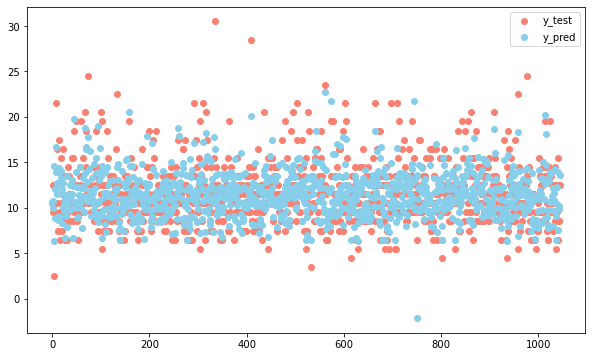

In [70]:
# Visualize predictions vs true labels
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label ="y_test")
plt.scatter(range(y_test.shape[0]), lr_y_pred, color="skyblue", label = "y_pred")
plt.legend();

# Linear Regression with Regularization (Ridge Regression)

In [71]:
#Importing Lasso and Ridge
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [72]:
#Import GridSearchCV.
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, cv = 5)

ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [73]:
print(ridge_regressor.best_params_)

{'alpha': 1}


In [74]:
ridge_reg = Ridge(alpha = 1)
ridge_reg.fit(x_train,y_train)

ridge_reg_pred = ridge_reg.predict(x_test)

In [75]:
#Creating an evaluation function.
def show_score(ridge_reg):
    ridge_x_pred = ridge_reg.predict(x_train)
    
    scores = {'Training MAE': mean_absolute_error(y_train,ridge_x_pred),
             'Test MAE': mean_absolute_error(y_test,ridge_reg_pred),
             'Training MSE': mean_squared_error(y_train, ridge_x_pred),
             'Test MSE': mean_squared_error(y_test,ridge_reg_pred),
             'Training RMSE': np.sqrt(mean_squared_error(y_train,ridge_x_pred)),
             'Test RMSE': np.sqrt(mean_squared_error(y_test,ridge_reg_pred)),
             'Training R2': r2_score(y_train,ridge_x_pred),
             'Test R2': r2_score(y_test,ridge_reg_pred)}
    
    return scores

In [76]:
show_score(ridge_reg)

{'Training MAE': 1.6005256609125689,
 'Test MAE': 1.5801550476571948,
 'Training MSE': 4.834759981784876,
 'Test MSE': 4.741647813855525,
 'Training RMSE': 2.1988087642596104,
 'Test RMSE': 2.177532505809161,
 'Training R2': 0.528393055251541,
 'Test R2': 0.5614211422598949}

# Linear Regression with Regularization (Lasso Regression)

In [77]:
lasso = Lasso(tol = 0.05)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, cv = 5)

lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(tol=0.05),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [78]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [79]:
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train,y_train)

lasso_reg_pred = ridge_reg.predict(x_test)

In [80]:
def show_score(lasso_reg):
    lasso_x_pred = lasso_reg.predict(x_train)
    
    scores = {'Training MAE': mean_absolute_error(y_train,lasso_x_pred),
             'Test MAE': mean_absolute_error(y_test,lasso_reg_pred),
             'Training MSE': mean_squared_error(y_train, lasso_x_pred),
             'Test MSE': mean_squared_error(y_test,lasso_reg_pred),
             'Training RMSE': np.sqrt(mean_squared_error(y_train,lasso_x_pred)),
             'Test RMSE': np.sqrt(mean_squared_error(y_test,lasso_reg_pred)),
             'Training R2': r2_score(y_train,lasso_x_pred),
             'Test R2': r2_score(y_test,lasso_reg_pred)}
    
    return scores

In [81]:
show_score(lasso_reg)

{'Training MAE': 1.600440556411716,
 'Test MAE': 1.5801550476571948,
 'Training MSE': 4.834512250161068,
 'Test MSE': 4.741647813855525,
 'Training RMSE': 2.198752430393442,
 'Test RMSE': 2.177532505809161,
 'Training R2': 0.5284172202472516,
 'Test R2': 0.5614211422598949}

# Bagging Regressor

In [82]:
#Importing Bagging
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor()

In [83]:
br.fit(x_train,y_train)

BaggingRegressor()

In [84]:
br_y_pred = br.predict(x_test)

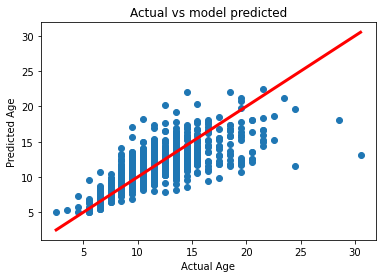

In [85]:
#From this scatter plot will visualize actual vs predicted age.

plt.scatter(y_test, br_y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs model predicted")

plt.show()

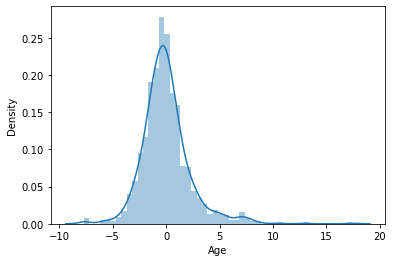

In [86]:
sns.distplot(y_test - br_y_pred)
plt.show()

In [87]:
#Creating an evaluation function.
def show_score(br):
    br_x_pred = br.predict(x_train)
    
    scores = {'Training MAE': mean_absolute_error(y_train,br_x_pred),
             'Test MAE': mean_absolute_error(y_test,br_y_pred),
             'Training MSE': mean_squared_error(y_train, br_x_pred),
             'Test MSE': mean_squared_error(y_test,br_y_pred),
             'Training RMSE': np.sqrt(mean_squared_error(y_train,br_x_pred)),
             'Test RMSE': np.sqrt(mean_squared_error(y_test,br_y_pred)),
             'Training R2': r2_score(y_train,br_x_pred),
             'Test R2': r2_score(y_test,br_y_pred)}
    
    return scores

In [88]:
show_score(br)

{'Training MAE': 0.6384738186462324,
 'Test MAE': 1.5678468899521532,
 'Training MSE': 0.9391155810983397,
 'Test MSE': 5.115712918660287,
 'Training RMSE': 0.9690797599260547,
 'Test RMSE': 2.261794181321609,
 'Training R2': 0.9083939158022161,
 'Test R2': 0.5268219790942301}

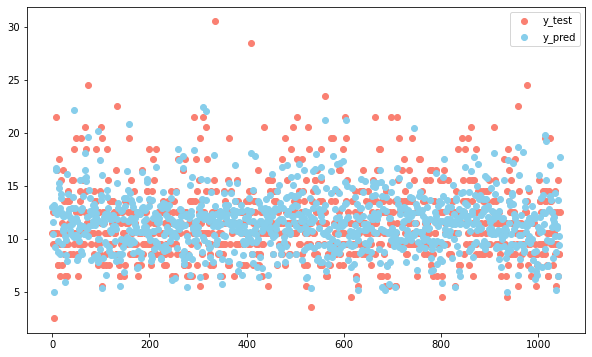

In [89]:
# Visualize predictions vs true labels
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label ="y_test")
plt.scatter(range(y_test.shape[0]), br_y_pred, color="skyblue", label = "y_pred")
plt.legend();

# Hyper tuning Bagging Regressor and will see if score improves.

In [98]:
parameters = {
    'n_estimators': [int(x) for x in np.linspace(10, 1000, 10)],
    'max_samples': [float(x) for x in np.arange(0.1, 1.1, 0.1)]
}

bg_regressor = GridSearchCV(br, parameters, cv = 5)

bg_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'max_samples': [0.1, 0.2, 0.30000000000000004, 0.4,
                                         0.5, 0.6, 0.7000000000000001, 0.8, 0.9,
                                         1.0],
                         'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780,
                                          890, 1000]})

In [99]:
bg_regressor.best_params_

{'max_samples': 0.2, 'n_estimators': 780}

In [103]:
br_tuned = BaggingRegressor(max_samples = 0.2, n_estimators = 780)
br_tuned.fit(x_train,y_train)
br_tuned_pred = br_tuned.predict(x_test)

In [104]:
#Creating an evaluation function.
def show_score(br_tuned):
    br_x_pred_tuned = br_tuned.predict(x_train)
    
    scores = {'Training MAE': mean_absolute_error(y_train,br_x_pred_tuned),
             'Test MAE': mean_absolute_error(y_test,br_tuned_pred),
             'Training MSE': mean_squared_error(y_train, br_x_pred_tuned),
             'Test MSE': mean_squared_error(y_test,br_tuned_pred),
             'Training RMSE': np.sqrt(mean_squared_error(y_train,br_x_pred_tuned)),
             'Test RMSE': np.sqrt(mean_squared_error(y_test,br_tuned_pred)),
             'Training R2': r2_score(y_train,br_x_pred_tuned),
             'Test R2': r2_score(y_test,br_tuned_pred)}
    
    return scores

In [105]:
show_score(br_tuned)

{'Training MAE': 1.2439078003733177,
 'Test MAE': 1.468514292724819,
 'Training MSE': 3.0937376510672636,
 'Test MSE': 4.425307358857966,
 'Training RMSE': 1.7589023995285422,
 'Test RMSE': 2.1036414520678104,
 'Training R2': 0.6982211801681892,
 'Test R2': 0.5906810621983609}

# LightGBM

In [108]:
#conda install -c conda-forge lightgbm

In [109]:
#Import LightGBM
import lightgbm as lgb

In [116]:
params = {
    'learning_rate': '0.01'
}

train_data = lgb.Dataset(x_train, label = y_train)

In [117]:
lgb_reg = lgb.train(params, train_data, 100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 3132, number of used features: 8
[LightGBM] [Info] Start training from score 11.414751


In [138]:
#Creating an evaluation function.
def show_score(lgb_reg):
    lgb_x_pred= lgb_reg.predict(x_train)
    lgb_y_pred= lgb_reg.predict(x_test)
    
    scores = {'Training MAE': mean_absolute_error(y_train,lgb_x_pred),
             'Test MAE': mean_absolute_error(y_test,lgb_y_pred),
             'Training MSE': mean_squared_error(y_train, lgb_x_pred),
             'Test MSE': mean_squared_error(y_test,lgb_y_pred),
             'Training RMSE': np.sqrt(mean_squared_error(y_train,lgb_x_pred)),
             'Test RMSE': np.sqrt(mean_squared_error(y_test,lgb_y_pred)),
             'Training R2': r2_score(y_train,lgb_x_pred),
             'Test R2': r2_score(y_test,lgb_y_pred)}
    
    return scores

In [139]:
show_score(lgb_reg)

{'Training MAE': 1.6078305791334713,
 'Test MAE': 1.6693896159801105,
 'Training MSE': 4.921102503339578,
 'Test MSE': 5.492323220830473,
 'Training RMSE': 2.2183558108066386,
 'Test RMSE': 2.3435706135788767,
 'Training R2': 0.5199707689445259,
 'Test R2': 0.49198739782138556}

# Next I am going to save the best model which is Bagging Regressor. Because as per my analysis Bagging regressor has give the best R2 score and less error score hence I will use it for abalone shellfish age prediction.

In [143]:
import pickle
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(br_tuned, open('br_model', 'wb'))

In [144]:
#Prediction using the saved model
load_model = pickle.load(open('br_model','rb'))

In [146]:
bagging = load_model.predict(x_test)

In [147]:
bagging

array([12.0025641 , 12.16410256, 10.8025641 , ...,  9.39230769,
       10.35384615, 14.01794872])

In [148]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
DF = pd.DataFrame({'Actual Age': y_test, 'Predicted Age': bagging})
DF = DF.style.hide_index()
DF

Actual Age,Predicted Age
10.500000,12.002564
12.500000,12.164103
9.500000,10.802564
2.500000,5.212821
12.500000,14.841026
10.500000,12.142308
9.500000,8.543590
21.500000,17.250000
12.500000,16.406410
16.500000,12.121795


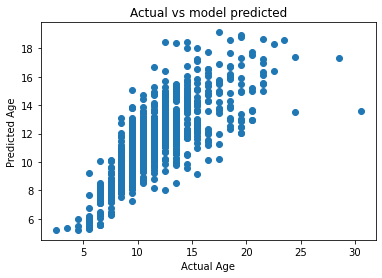

In [149]:
#From this scatter plot will visualize actual vs predicted age.

plt.scatter(y_test, bagging)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs model predicted")

plt.show()